To use Padé approximants for approximating sin (x), first find the Taylor series of sin (x) around x=0, then equate it to a rational function P(x)/Q(x) where P(x) and Q(x) are polynomials with Q(x)'s constant term being 1

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math
import time

build Taylor coefficients for sin(x) i choose a higher degree for the taylor order to have the approximation
fit sinx better for longer

In [64]:
N = 14 # total taylor order (degrees for P and Q will be half this)
coeffs = [0.0] * (N + 1)   
# forming the taylor series
for n in range(N + 1):
    if n % 2 == 1:  # this makes only odd powers have none zeros
        coeffs[n] = ((-1) ** ((n - 1) // 2)) / math.factorial(n)
    else:
        coeffs[n] = 0.0

In [65]:
start = time.perf_counter()
m = 7  # the degree for P and Q
p_poly, q_poly = interpolate.pade(coeffs, m)
# do research on how the coefficients are written and make a for loop for this and make a comparison as well


print("Numerator polynomial P(x):", p_poly)   
print("Denominator polynomial Q(x):", q_poly)

# P_poly and Q_poly come back as arrays this turns them into a callable function
p = np.poly1d(p_poly) 
q = np.poly1d(q_poly)

def pade_eval(x):
    denom = q(x)
    safe = np.abs(denom) > 1e-12 # avoids divide by zero
    y = np.full_like(x, np.nan, dtype=float) 
    # ^^ Creates an array y the same shape as x, filled with not-a-number to 
    # avoid unsafe values that might divide by zero
    y[safe] = p(x[safe]) / denom[safe] # only evaluate P(x)/Q(x) at safe positions
    return y # gives the safe values and the NaN
end = time.perf_counter()

Numerator polynomial P(x):             7            5          3
-4.163e-05 x + 0.004586 x - 0.1425 x + 1 x
Denominator polynomial Q(x):            6             4           2
1.595e-06 x + 0.0002761 x + 0.02414 x + 1


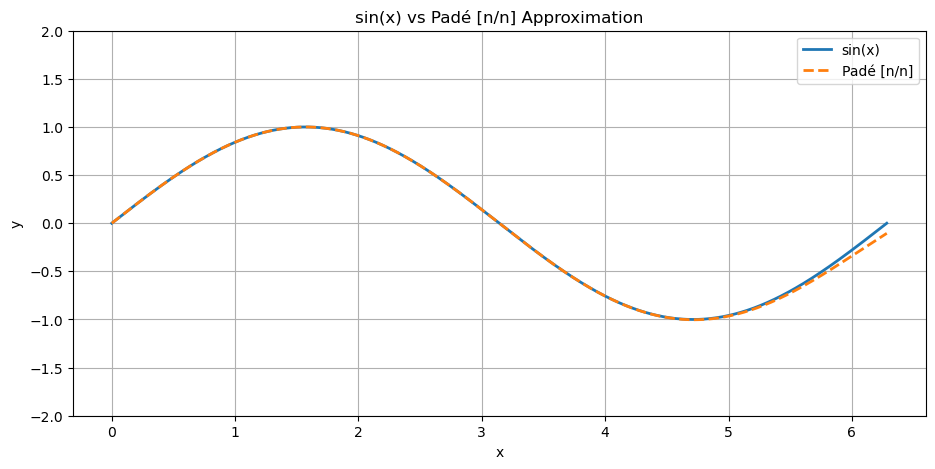

Time for one call: 0.00262830 seconds
Mean Absolute Error: 7.999635e-03
Root Mean Square Error: 2.107252e-02
Max Absolute Error: 1.050387e-01
Min Absolute Error: 0.000000e+00


In [66]:
#This is the 0,2pi range the project asks for but it doesnt  show how pade's accuracy starts to 
# fail on the left side of the graph on the negative side as well as the positive  

x_vals = np.linspace(0, 2 * np.pi, 2000)
y_sin = np.sin(x_vals)
y_pade = pade_eval(x_vals)

abs_error = np.abs(y_sin - y_pade)
mean_abs_err = np.mean(abs_error)
root_mean_squ_err = np.sqrt(np.mean((y_sin - y_pade)**2))
max_error = np.max(abs_error)
min_error = np.min(abs_error)


plt.figure(figsize=(11,5))
plt.plot(x_vals, y_sin, label='sin(x)', linewidth=2)
plt.plot(x_vals, y_pade, '--', label='Padé [n/n]', linewidth=2)
plt.title('sin(x) vs Padé [n/n] Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.show()
print(f"Time for one call: {end - start:.8f} seconds")
print(f"Mean Absolute Error: {mean_abs_err:.6e}")
print(f"Root Mean Square Error: {root_mean_squ_err:.6e}")
print(f"Max Absolute Error: {max_error:.6e}")
print(f"Min Absolute Error: {min_error:.6e}")

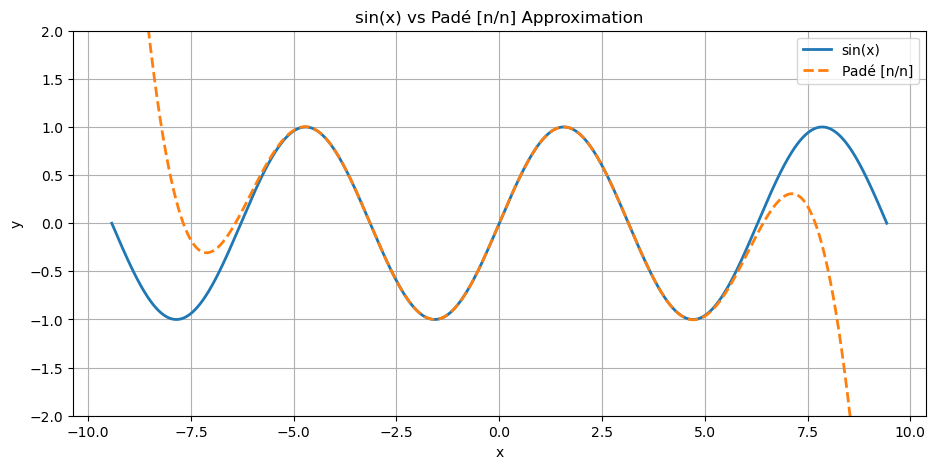

Time for one call: 0.00262830 seconds
Mean Absolute Error: 6.613732e-01
Root Mean Square Error: 1.570795e+00
Max Absolute Error: 6.816235e+00
Min Absolute Error: 0.000000e+00


In [68]:
# this is to show how the pade approx looks on both sides to understand better what its doing and how it functions

x_vals = np.linspace(-3 * np.pi, 3 * np.pi, 2000)
y_sin = np.sin(x_vals)
y_pade = pade_eval(x_vals)

abs_error = np.abs(y_sin - y_pade)
mean_abs_err = np.mean(abs_error)
root_mean_squ_err = np.sqrt(np.mean((y_sin - y_pade)**2))
max_error = np.max(abs_error)
min_error = np.min(abs_error)


plt.figure(figsize=(11,5))
plt.plot(x_vals, y_sin, label='sin(x)', linewidth=2)
plt.plot(x_vals, y_pade, '--', label='Padé [n/n]', linewidth=2)
plt.title('sin(x) vs Padé [n/n] Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.show()
print(f"Time for one call: {end - start:.8f} seconds")
print(f"Mean Absolute Error: {mean_abs_err:.6e}")
print(f"Root Mean Square Error: {root_mean_squ_err:.6e}")
print(f"Max Absolute Error: {max_error:.6e}")
print(f"Min Absolute Error: {min_error:.6e}")

# (notes to self) still do some digging on scalability 

def pade_from_taylor(a, m, n, tol=1e-12):

#  Build a Pade approximant P(x)/Q(x) from Taylor coefficients a_n
#    a : list of Taylor coefficients a0, a1, a2, ...
#    m : degree of numerator polynomial P(x)
#    n : degree of denominator polynomial Q(x)
#    tol: tolerance for detecting ill-conditioned systems 

a = np.asarray(a, dtype=float)